# Boundary-Value-Problems-for-ODE

## 10.01 Boundary Value Problems

The ODE $y' = f(t,y)$ does not determine a unique solution.
* A kth order ODE requires $k$ side conditions $y_i$ where $i = 1, \cdots, k$ to determine a unique solution.
* If the $y_i$ are specified at values of $t \neq 0$, then the conditions are referred to as **boundary conditions** (BC).

General first-order two-point BVP with $f: \mathbb{R}^{n+1} \rightarrow \mathbb{R}^n$ given by: 
$$
y' = f(t, y), \qquad a < t < b
$$

and BC $g: \mathbb{R}^{2n} \rightarrow \mathbb{R}^n$ given by:
$$
g(y(a), y(b)) = 0
$$

#### Boundary Conditions
**Separated** (def): $g$ contains solution values at $a$ or $b$, but not both.

**Linear** (def): form sum of matrix-vector products
$$
B_a y(a) + B_b y(b) = c
$$
where
* $B_a$ and $B_b$ are $n \times n$ matrices
* $c$ is a $n \times 1$ vector

#### Existence and Uniqueness
Solvability of BVP with **nonlinear BC** is difficult to establish.

BVP with **linear BC** has unique solution IFF matrix $Q$ is nonsingular:
$$
Q \equiv B_a Y(a) + B_b Y(b)
$$
where
* $Y(t)$ is the matrix whose ith column is $y_i(t)$ and $Y$ is called the fundamental solution matrix for the ODE, and its columns are called solution modes.

#### Conditioning and Stability
For BVP solution is determined everywhere simultaneously.
* For BVP to be well-conditioned growing and decaying modes must be controlled by BC.

Integrate the two-point BVP for the second-order ODE $u'' = 6t$ and $0 < t < 1$ with BC $u(0) = 0$ and $u(1) = 1$.

Note: From calculus we know that $\int 6t\, dt = 3t^2 + C$ and $\int 3t^2\, dt = t^3 + C$.  Based on the initial conditions, the value of $C = 0$. 

In [1]:
import math
import numpy as np
import scipy.integrate as integrate

def fty(t, y):
    """
    Evaluate the n differential equations y^{(i)}(t) at t for i=1..n.
    
    y is an input matrix with the following components
        y_0 = u
        y_1 = u'

    Returns a matrix of derivatives for each component of y.
        y_0' = u'
        y_1' = u''
    """
    return np.vstack((y[1], 6.*t))


# Setup boundary conditions.
bc = lambda ya, yb: np.array([ya[0], yb[0]-1.])

# Integrate from [0, 1] with step size 0.5.
t0, tn, nsteps = 0., 1., 2
t_eval = np.linspace(t0, tn, nsteps+1)
y0 = np.zeros((2, t_eval.size))  # Initial guess.
result = integrate.solve_bvp(fty, bc, t_eval, y0)
np.testing.assert_equal(result.success, True)

# Verify boundary conditions are satisfied at t=0 and t=1.
np.testing.assert_equal(result.sol(0)[0], 0.)
np.testing.assert_equal(result.sol(1)[0], 1.)

# Verify solution at some other point t=0.5 based on calculus.
np.testing.assert_equal(result.sol(0.5), 
                        np.array([math.pow(0.5, 3), 3.*0.5*0.5]))

# Print the solution u and u' at t=1.
print(result.sol(1))

[1. 3.]


Integrate the two-point BVP for the third-order ODE $y''' = 2y'' + 6ty$ and $0 < t < 5$ with BC $y(0) = 2$ and $y(5) = 0$ and $y'(5) = 0$.

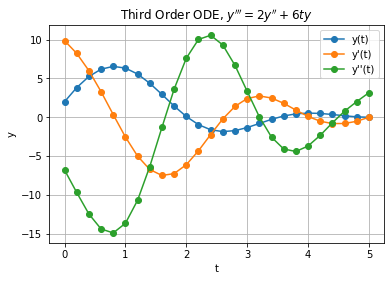

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

%matplotlib inline

def fty(t, y):
    """
    Evaluate the n differential equations y^{(i)}(t) at t for i=1..n.
    
    y is an input matrix with the following components
        y_0 = u
        y_1 = u'
        y_2 = u''

    Returns a matrix of derivatives for each component of y.
        y_0' = u'
        y_1' = u''
        y_2' = u'''
    """
    return np.vstack((y[1], y[2], 2*y[2] + 6.*t*y[0]))


# Setup boundary conditions.
bc = lambda ya, yb: np.array([ya[0]-2., yb[0], yb[1]])

# Integrate from [0, 1] with step size 0.5.
t0, tn, nsteps = 0., 5., 25
t_eval = np.linspace(t0, tn, nsteps+1)
y0 = np.zeros((3, t_eval.size))  # Initial guess.
result = integrate.solve_bvp(fty, bc, t_eval, y0)
np.testing.assert_equal(result.success, True)

# Verify boundary conditions are satisfied at t=0 and t=5.
np.testing.assert_equal(result.sol(0)[0], 2.)
np.testing.assert_almost_equal(result.sol(5.)[:2], np.zeros(2))

# Plot approximate solution.
plt.plot(t_eval, result.sol(t_eval)[0,:], marker='o', label='y(t)')
plt.plot(t_eval, result.sol(t_eval)[1,:], marker='o', label="y'(t)")
plt.plot(t_eval, result.sol(t_eval)[2,:], marker='o', label="y''(t)")
plt.title("Third Order ODE, $y''' = 2y'' + 6ty$")
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

## 10.02 Numerical Methods for BVP

#### Shooting Method
Given BC $u(a) = \alpha$ and $u(b) = \beta$.
1. **Guess** values for $u'(a)$ and solve the resulting IVP.
2. Compare solution from previous step at $b$ with the BC $u(b) = \beta$.
3. Repeat step 1 until the solution obtained matches the BC at $b$.
  * Use root-finding method to obtain the next guess for $u'(a)$ that is successively closer to $u(b) = \beta$. 

Shooting method inherits stability of associated IVP.
* Can be unstable even when BVP is stable.
* Workaround: Divide integration interval into subintervals. Perform shooting on each subinterval.


## 10.03 Finite Difference Method

#### Finite Difference Method
Convert BVP into system of algebraic equations by replacing all derivatives with finite difference approximations.

Given $u'' = f(t, u, u')$ and $a < t < b$ with BC $u(a) = \alpha$ and $u(b) = \beta$.
1. Compute mesh points $t_i = a + ih$ where step size $h = (b-a)/(n+1)$ and $i = 0, \cdots, n+1$.
2. Compute the finite difference approximation of derivative at each mesh point.
$$
u'(t_i) \approx \frac{y_{i+1} - y_{i-1}}{2h} \\
u''(t_i) \approx \frac{y_{i+1} - 2y_i + y_{i-1}}{h^2}
$$
3. Form the system of equations and solve for $y_i$ and $i = 1, \cdots, n$.  The second two equations are used at the boundary conditions.
$$
\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} = f \left( t_i, y_i, \frac{y_{i+1} - y_{i-1}}{2h} \right) \\
y_2 - 2y_1 + a = h^2 f \left( x_1, y_1, \frac{y_2 - y_a}{2h} \right) \\
b - 2y_n + y_{n+1} = h^2 f \left( x_n, y_n, \frac{b - y_{n-1}}{2h} \right) \\
$$

The form of the system formed from the finite difference equations is **tridiagonal**.
* A tridiagonal system of bandwidth $\beta$ requires only $O(\beta n)$ storage and $O(\beta^2 n)$ work to factorize using LU factorization.

Integrate the two-point BVP for the second order ODE $y'' = -4y + 4t$ and $0 < t < \pi/2$ with BC $y(0) = 0$ and $y'(\pi/2) = 0$ using the finite difference method and $n = 10$.

The linear system used to solve this ODE can be simplified using the steps shown below:
$$
\begin{aligned}
& y_{i+1} - 2y_i + y_{i-1} - h^2 f \left( t_i, y_i, \frac{y_{i+1} - y_{i-1}}{2h} \right) &&= 0 &&& (1) \\
& y_{i+1} - 2y_i + y_{i-1} - h^2 (-4y_i + 4t_i) &&= 0 &&& (2) \\
& y_{i+1} - 2y_i + y_{i-1} + 4 h^2 y_i - 4 h^2 t_i &&= 0 &&& (3) \\
& y_{i+1} + y_i (-2 + 4 h^2) + y_{i-1} &&= 4 h^2 t_i &&& (4) \\
\end{aligned}
$$

The tridiagonal matrix becomes:
$$
\begin{bmatrix}
1 & 0 & & & \\
1 & -2 + 4 h^2 & 1 & & \\
  & \ddots & \ddots & \ddots & \\
  & & 1 & -2 + 4 h^2 & 1 \\
  & & & 2 & -2 + 4 h^2 \\
\end{bmatrix}
\begin{bmatrix}
y_0 \\
y_1 \\
\vdots \\
y_{n-1} \\
y_n \\
\end{bmatrix} =
\begin{bmatrix}
0 \\
4 h^2 t_1 \\
\vdots \\
4 h^2 t_{n-1} \\
4 h^2 t_n \\
\end{bmatrix}
$$

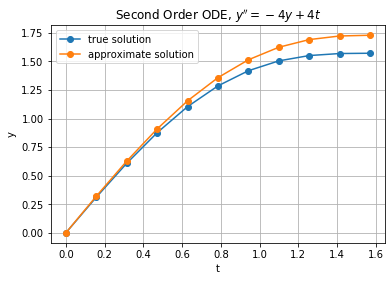

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

%matplotlib inline

def tridiag_bvp(n, a, b):
    """
    Form tridiagonal matrix A and vector b used to solve two-point BVP.
    
    n is the number of interior mesh points, excluding the BC.
    a, b is the interval of integration.
    
    Returns 
        A is the matrix of coefficients.
        B is the right hand side.
        h is the mesh spacing.
        t is the location of the mesh points.
    """
    h = (b-a)/(n+1)
    t = np.linspace(a, b, n+1, endpoint=True)
    
    # d are lower diagonal, diagonal, and upper diagonal vectors.
    d = np.ones(n), np.ones(n+1), np.ones(n)
    # First equation should be y_0 = 0
    d[2][0] = 0.
    # Last equation should be 2 y_{n-1} + ... = 4 h^2 y_n
    d[0][n-1] = 2.
    # Interior diagonals should be y_{i-1} + y_i (-2 + 4 h^2) + y_{i+1}
    d[1][1:] = -2. + 4.*h*h
    # Form the tridiagonal matrix A.
    A = np.diag(d[0], k=-1) + np.diag(d[1], k=0) + np.diag(d[2], k=1)

    # Form the right hand side.
    B = 4.*h*h*t

    return A, B, h, t


# Obtain the system of equations for the BVP.
n, a, b = 10, 0., np.pi/2.
A, B, h, t = tridiag_bvp(n, a, b)

# Factorize A into [L|U].
# NOTE(mmorais): Use P^T to reorder the right-hand side.
P, L, U = la.lu(A)

# Solve Ay = b for x.
# 1. Solve Lx=B for x.
x = la.solve_triangular(L, np.matmul(P.T, B), lower=True)
# 2. Solve Uy=x for y.
y = la.solve_triangular(U, x, lower=False)

# Compute the exact solution
ytrue = t + np.sin(t) * np.cos(t)

# Plot the true and approximate solution.
plt.plot(t, ytrue, marker='o', label="true solution")
plt.plot(t, y, marker='o', label='approximate solution')
plt.title("Second Order ODE, $y'' = -4y + 4t$")
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

Integrate the two-point BVP for the second order ODE $y'' = -3yy'$ and $0 < t < 2$ with BC $y(0) = 0$ and $y(2) = 1$ using the finite difference method and $n = 10$.

Since the system of equations is nonlinear we will use a nonlinear iterative solver.
$$
y_{i+1} - 2y_i + y_{i-1} - h^2 f \left( t_i, y_i, \frac{y_{i+1} - y_{i-1}}{2h} \right) = 0
$$

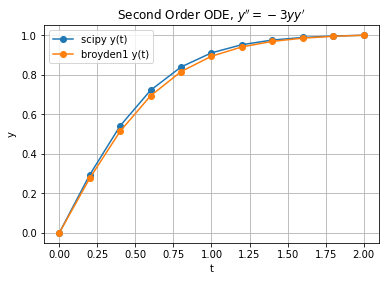

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as opt

%matplotlib inline

def residual(ftyyp, t, h, y):
    """
    Compute residual of nonlinear system used to solve two-point BVP.
    """
    n = t.size
    r = np.zeros(n)
    # Residual at first mesh point is y_0 - 0.
    r[0] = y[0]
    # Interior mesh points should be y_{i-1} - 2y_i + y_{i+1} - h^2 f.
    f = ftyyp(t, y[1:n-1], (y[2:n] - y[0:n-2])/(2.*h))
    r[1:n-1] = y[0:n-2] - 2.*y[1:n-1] + y[2:n] - h*h*f
    # Residual at last mesh point is y_n -  1.
    r[n-1] = y[n-1] - 1.
    return r


def ftyyp(t, y, yp):
    """
    Evaluate the function at t, y, and y'.
    """
    return -3.*y*yp


# Obtain the system of equations for the BVP.
n, a, b = 10, 0., 2.

# Compute the mesh points and initial guess.
h = (b-a)/(n+1)
t = np.linspace(a, b, n+1, endpoint=True)

# Use a straight line from a to b with y(b) = 1 as initial guess.
yinitial = a + 1./(b-a)*t

# Solve the nonlinear system of equations using Broyden's good method.
soln = opt.broyden1(lambda y: residual(ftyyp, t, h, y), yinitial)

# Verify boundary conditions are satisfied at t=0 and t=2.
np.testing.assert_equal(soln[0], 0.)
np.testing.assert_equal(soln[n], 1.)

# Compare solution obtained for nonlinear system to scipy BVP solver.
fty = lambda t, y: np.vstack((y[1], -3.*y[0]*y[1]))
bc = lambda ya, yb: np.array([ya[0], yb[0]-1.])
y0 = np.zeros((2, t.size))  # Initial guess.
spy_soln = integrate.solve_bvp(fty, bc, t, y0)
np.testing.assert_equal(spy_soln.success, True)

# Plot approximate solution.
plt.plot(t, spy_soln.sol(t)[0,:], marker='o', label='scipy y(t)')
plt.plot(t, soln, marker='o', label='broyden1 y(t)')
plt.title("Second Order ODE, $y'' = -3yy'$")
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

## 10.04 Collocation Method

## 10.05 Galerkin Method

## 10.06 Eigenvalue Problems

## Summary: Boundary Value Problems for ODE